In [2]:
# standard DS/ML modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data processing and feature engineering modules
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.impute import SimpleImputer

# out of the box models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# modules for model evaluation
from sklearn.metrics import (
    plot_roc_curve, 
    roc_curve, 
    accuracy_score, 
    classification_report,
    f1_score,
    multilabel_confusion_matrix,
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    roc_auc_score,
    zero_one_loss,
) 

In [3]:
mma_bout_data = pd.read_csv('./mma_data/ufc_historical_data.csv')

In [108]:
mma_bout_data['R_Stance'].value_counts()

Orthodox       4538
Southpaw       1231
Switch          197
Open Stance      15
Sideways          2
Name: R_Stance, dtype: int64

In [7]:
mma_bout_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 144 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    R_fighter                     6012 non-null   object 
 1    B_fighter                     6012 non-null   object 
 2    Referee                       5980 non-null   object 
 3    date                          6012 non-null   object 
 4    location                      6012 non-null   object 
 5    Winner                        6012 non-null   object 
 6    title_bout                    6012 non-null   bool   
 7    weight_class                  6012 non-null   object 
 8    B_avg_KD                      4585 non-null   float64
 9    B_avg_opp_KD                  4585 non-null   float64
 10   B_avg_SIG_STR_pct             4585 non-null   float64
 11   B_avg_opp_SIG_STR_pct         4585 non-null   float64
 12   B_avg_TD_pct                  4585 non-null   

In [112]:
pd.set_option('display.max_columns', 160)
mma_bout_data.describe(include="all")b

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,6012,6012,5980,6012,6012,6012,6012,6012,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.00000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.0,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,6012.000000,5946,6002.000000,5121.000000,6004.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,5300.00000,

In [114]:
for index, col in enumerate(mma_bout_data.columns):
    print(index, col)

0 R_fighter
1 B_fighter
2 Referee
3 date
4 location
5 Winner
6 title_bout
7 weight_class
8 B_avg_KD
9 B_avg_opp_KD
10 B_avg_SIG_STR_pct
11 B_avg_opp_SIG_STR_pct
12 B_avg_TD_pct
13 B_avg_opp_TD_pct
14 B_avg_SUB_ATT
15 B_avg_opp_SUB_ATT
16 B_avg_REV
17 B_avg_opp_REV
18 B_avg_SIG_STR_att
19 B_avg_SIG_STR_landed
20 B_avg_opp_SIG_STR_att
21 B_avg_opp_SIG_STR_landed
22 B_avg_TOTAL_STR_att
23 B_avg_TOTAL_STR_landed
24 B_avg_opp_TOTAL_STR_att
25 B_avg_opp_TOTAL_STR_landed
26 B_avg_TD_att
27 B_avg_TD_landed
28 B_avg_opp_TD_att
29 B_avg_opp_TD_landed
30 B_avg_HEAD_att
31 B_avg_HEAD_landed
32 B_avg_opp_HEAD_att
33 B_avg_opp_HEAD_landed
34 B_avg_BODY_att
35 B_avg_BODY_landed
36 B_avg_opp_BODY_att
37 B_avg_opp_BODY_landed
38 B_avg_LEG_att
39 B_avg_LEG_landed
40 B_avg_opp_LEG_att
41 B_avg_opp_LEG_landed
42 B_avg_DISTANCE_att
43 B_avg_DISTANCE_landed
44 B_avg_opp_DISTANCE_att
45 B_avg_opp_DISTANCE_landed
46 B_avg_CLINCH_att
47 B_avg_CLINCH_landed
48 B_avg_opp_CLINCH_att
49 B_avg_opp_CLINCH_landed
50 

In [10]:
recent_bouts = mma_bout_data.copy()
limit_date = '2001-04-01'
recent_bouts = recent_bouts[recent_bouts['date'] > limit_date]

In [11]:
recent_bouts.shape

(5758, 144)

In [12]:
mma_bout_data.shape

(6012, 144)

In [8]:
# removing the following columns as they don't seem to have predictive 
# value. things like the fighter's name, the date of the match, the referee
# also dropping weight class because it is categorical and there are many categories
mma_bout_data = mma_bout_data.drop(['R_fighter', 'B_fighter', 'Referee', 'date', 'location', 'title_bout', 
                                    'weight_class','B_draw','R_draw'], axis=1)


# replacing missing values of reach with height where possible 
mma_bout_data['R_Reach_cms'].fillna(mma_bout_data['R_Height_cms'], inplace=True)
mma_bout_data['B_Reach_cms'].fillna(mma_bout_data['B_Height_cms'], inplace=True)

# replcae missing stances with 'Orthodox' which is the modal category
mma_bout_data['R_Stance'].fillna('Orthodox', inplace=True)
mma_bout_data['B_Stance'].fillna('Orthodox', inplace=True)

# ALTERNATIVE: drop rows with missing values for simplicity
# mma_bout_data = mma_bout_data.dropna().copy()

# drop all fights which ended as a draw, this is a rare outcome 
# removing this outcome turns the problem into a binary classification problem
mma_bout_data = mma_bout_data[mma_bout_data.Winner != "Draw"]

# Throw out the data coming before April, 2001. This is when unified rules were put into place for ufc events

In [9]:
# handle categorical columns, just two left now - the stance of each fighter
categorical_cols = ['B_Stance', 'R_Stance']
numeric_cols = list(set(mma_bout_data.columns) - set(categorical_cols) - {'Winner'})

mma_bout_data = pd.get_dummies(mma_bout_data, columns=categorical_cols)

In [120]:
for index, col in enumerate(mma_bout_data.columns):
    print(index, col)

0 Winner
1 B_avg_KD
2 B_avg_opp_KD
3 B_avg_SIG_STR_pct
4 B_avg_opp_SIG_STR_pct
5 B_avg_TD_pct
6 B_avg_opp_TD_pct
7 B_avg_SUB_ATT
8 B_avg_opp_SUB_ATT
9 B_avg_REV
10 B_avg_opp_REV
11 B_avg_SIG_STR_att
12 B_avg_SIG_STR_landed
13 B_avg_opp_SIG_STR_att
14 B_avg_opp_SIG_STR_landed
15 B_avg_TOTAL_STR_att
16 B_avg_TOTAL_STR_landed
17 B_avg_opp_TOTAL_STR_att
18 B_avg_opp_TOTAL_STR_landed
19 B_avg_TD_att
20 B_avg_TD_landed
21 B_avg_opp_TD_att
22 B_avg_opp_TD_landed
23 B_avg_HEAD_att
24 B_avg_HEAD_landed
25 B_avg_opp_HEAD_att
26 B_avg_opp_HEAD_landed
27 B_avg_BODY_att
28 B_avg_BODY_landed
29 B_avg_opp_BODY_att
30 B_avg_opp_BODY_landed
31 B_avg_LEG_att
32 B_avg_LEG_landed
33 B_avg_opp_LEG_att
34 B_avg_opp_LEG_landed
35 B_avg_DISTANCE_att
36 B_avg_DISTANCE_landed
37 B_avg_opp_DISTANCE_att
38 B_avg_opp_DISTANCE_landed
39 B_avg_CLINCH_att
40 B_avg_CLINCH_landed
41 B_avg_opp_CLINCH_att
42 B_avg_opp_CLINCH_landed
43 B_avg_GROUND_att
44 B_avg_GROUND_landed
45 B_avg_opp_GROUND_att
46 B_avg_opp_GROUND_lan

In [10]:
mma_bout_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 0 to 6011
Data columns (total 143 columns):
 #    Column                        Non-Null Count  Dtype  
---   ------                        --------------  -----  
 0    Winner                        5902 non-null   object 
 1    B_avg_KD                      4507 non-null   float64
 2    B_avg_opp_KD                  4507 non-null   float64
 3    B_avg_SIG_STR_pct             4507 non-null   float64
 4    B_avg_opp_SIG_STR_pct         4507 non-null   float64
 5    B_avg_TD_pct                  4507 non-null   float64
 6    B_avg_opp_TD_pct              4507 non-null   float64
 7    B_avg_SUB_ATT                 4507 non-null   float64
 8    B_avg_opp_SUB_ATT             4507 non-null   float64
 9    B_avg_REV                     4507 non-null   float64
 10   B_avg_opp_REV                 4507 non-null   float64
 11   B_avg_SIG_STR_att             4507 non-null   float64
 12   B_avg_SIG_STR_landed          4507 non-null   

In [132]:
data_train, data_test = train_test_split(mma_bout_data, test_size=0.2,
                                        random_state = 888, stratify=mma_bout_data['Winner'])

In [133]:
# now set aside one-hot-encoded column titles for further processing on numeric columns
categorical_cols = ['B_Stance_Open Stance','B_Stance_Orthodox','B_Stance_Southpaw',
                    'B_Stance_Switch','R_Stance_Open Stance', 'R_Stance_Orthodox', 
                    'R_Stance_Southpaw', 'R_Stance_Switch']
numeric_cols = list(set(mma_bout_data.columns) - set(categorical_cols) - {'Winner'})

X_train_num = data_train[numeric_cols].copy()
X_train_cat = data_train[categorical_cols].copy()

# impute missing values where possible into the numeric columns 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_num = imputer.fit_transform(X_train_num)

In [134]:
# scale the numerical data (normalize)
scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num = scaler.transform(X_train_num)
X_train_cat = X_train_cat.to_numpy()
X_train = np.hstack((X_train_num, X_train_cat))
y_train = data_train['Winner']

In [141]:
# data_train = data_train[list(set(mma_bout_data.columns)-{'Winner'})]
selector = SelectKBest(f_classif,k=60).fit(X_train, y_train)
selector.scores_.shape

(142,)

<BarContainer object of 142 artists>

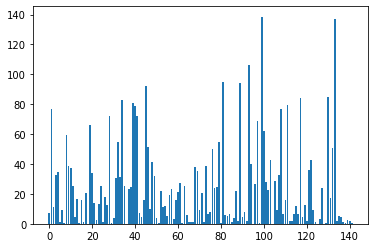

In [136]:
plt.bar(np.arange(selector.scores_.shape[0]), selector.scores_)

In [138]:
for i, score in zip(mma_bout_data.columns[1:], selector.scores_):
    print(i, score)

B_avg_KD 6.967724722409511
B_avg_opp_KD 76.95143214762005
B_avg_SIG_STR_pct 11.359396961756321
B_avg_opp_SIG_STR_pct 32.35422249205359
B_avg_TD_pct 34.823588591335344
B_avg_opp_TD_pct 0.9685459093833126
B_avg_SUB_ATT 9.179345801646907
B_avg_opp_SUB_ATT 0.5661473819923698
B_avg_REV 59.49047318057728
B_avg_opp_REV 38.44137439461356
B_avg_SIG_STR_att 37.36133211003407
B_avg_SIG_STR_landed 25.199708723527955
B_avg_opp_SIG_STR_att 4.883169829243446
B_avg_opp_SIG_STR_landed 16.823429240536417
B_avg_TOTAL_STR_att 0.5561101004016251
B_avg_TOTAL_STR_landed 16.174130273677843
B_avg_opp_TOTAL_STR_att 0.9803561593572571
B_avg_opp_TOTAL_STR_landed 20.73419225806934
B_avg_TD_att 0.07476950933122134
B_avg_TD_landed 66.44262234391351
B_avg_opp_TD_att 34.137334463224484
B_avg_opp_TD_landed 13.661579376267035
B_avg_HEAD_att 2.4932299405733716
B_avg_HEAD_landed 13.163340057414166
B_avg_opp_HEAD_att 25.483890476308872
B_avg_opp_HEAD_landed 1.00675763353261
B_avg_BODY_att 17.773340758959048
B_avg_BODY_land

In [142]:
X_train = selector.transform(X_train)

In [140]:
column_scores = zip(mma_bout_data.columns[1:], selector.scores_)
column_scores = sorted(column_scores, key=lambda x: x[1])
for i, score in enumerate(column_scores):
    print(i, score[0], score[1])

0 R_avg_CLINCH_landed 0.0023577603141761777
1 B_avg_opp_DISTANCE_att 0.060817968207765784
2 R_avg_LEG_att 0.06363171225128617
3 B_avg_TD_att 0.07476950933122134
4 R_win_by_Submission 0.08159155496605033
5 R_Reach_cms 0.1827275464736863
6 B_Height_cms 0.24540385120448738
7 R_Stance_Switch 0.2782531731172833
8 R_avg_opp_LEG_landed 0.4170278094699608
9 R_avg_TOTAL_STR_landed 0.5070539513570941
10 B_avg_opp_BODY_landed 0.5481718403539493
11 B_avg_TOTAL_STR_att 0.5561101004016251
12 B_avg_opp_SUB_ATT 0.5661473819923698
13 R_Stance_Orthodox 0.7215903043403263
14 R_Weight_lbs 0.7352270794321779
15 B_current_win_streak 0.8612074292706355
16 R_avg_SIG_STR_pct 0.9665818567283424
17 B_avg_opp_TD_pct 0.9685459093833126
18 B_avg_opp_TOTAL_STR_att 0.9803561593572571
19 B_avg_opp_HEAD_landed 1.00675763353261
20 R_avg_opp_TD_att 1.1734514780500194
21 R_avg_opp_KD 1.2250800717236474
22 R_win_by_KO/TKO 1.4503287199305868
23 R_avg_opp_SUB_ATT 1.4597884151135887
24 R_Stance_Open Stance 1.5307039824148285


In [143]:
# train models

# logistic regression without and with a regularization term
log_reg_clf = LogisticRegression(penalty='none', max_iter=2000)
log_reg_clf.fit(X_train, y_train)

log_reg_clf_l2 = LogisticRegression(penalty='l2', max_iter=2000)
log_reg_clf_l2.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier(random_state=888)
rf_clf.fit(X_train, y_train)

# # KNN
# knn_clf = KNeighborsClassifier(n_neighbors=5)
# knn_clf.fit(X_train, y_train)

# # Gaussian process
# gp_clf = GaussianProcessClassifier(kernel=1.0*RBF(1.0))
# gp_clf.fit(X_train, y_train)

# # Multi-layer Perceptron (Neural Net)
# mlp_clf = MLPClassifier(random_state=888, max_iter=5000)
# mlp_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=888)

In [19]:
# logistic regression without and with a regularization term
log_reg_clf_recent = LogisticRegression(penalty='none', max_iter=2000)
log_reg_clf_recent.fit(Xrecent_train, yrecent_train)

log_reg_clf_l2_recent = LogisticRegression(penalty='l2', max_iter=2000)
log_reg_clf_l2_recent.fit(Xrecent_train, yrecent_train)

# Random Forest
rf_clf_recent = RandomForestClassifier(random_state=888)
rf_clf_recent.fit(Xrecent_train, yrecent_train)

RandomForestClassifier(random_state=888)

In [149]:
# do processing on test data to match training data - impute missing value
# and scaling 

# TODO: impute missing values in test data based on training data
# rationale - for new incoming data must rely on the training data that you have

X_test_num = data_test[numeric_cols].copy()
X_test_cat = data_test[categorical_cols].copy()

# test_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_test_num = imputer.transform(X_test_num)

# test_scaler = StandardScaler()
X_test_num = scaler.transform(X_test_num)


X_test_num = test_scaler.transform(X_test_num)
X_test_cat = X_test_cat.to_numpy()
X_test = np.hstack((X_test_num, X_test_cat))
X_test = selector.transform(X_test)
y_test = data_test['Winner']
X_test.shape

(1181, 60)

In [146]:
log_reg_clf.score(X_test,y_test)

0.6756985605419137

In [147]:
log_reg_clf_recent.score(Xrecent_test, yrecent_test)

0.6737400530503979

In [148]:
log_reg_clf_l2_recent.score(Xrecent_train, yrecent_train)

0.7009283819628647

In [ ]:
log_reg_clf_l2.score(Xree,y_test)

In [22]:
log_reg_clf_l2_recent.score(Xrecent_test, yrecent_test)

0.6799292661361627

In [67]:
rf_clf.score(X_test,y_test)

0.6841659610499576

In [23]:
rf_clf_recent.score(Xrecent_test, yrecent_test)

0.6622458001768347

In [69]:
knn_clf.score(X_test, y_test)

0.6477561388653683

In [70]:
gp_clf.score(X_test, y_test)

0.6943268416596104

In [71]:
mlp_clf.score(X_test, y_test)

0.6248941574936494

/Users/vaughnfranz/Northeastern/Machine Learning - CS 6140/mma-bout-prediction/mma_prediction_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


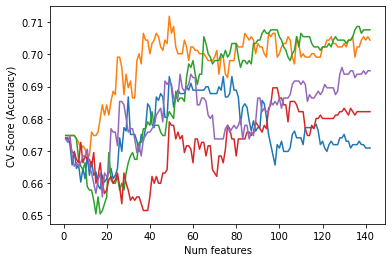

In [76]:
# introduce cross validation with recursive feature elimination
log_reg_validated = LogisticRegression(penalty='none', max_iter=2000)

log_reg_rfecv = RFECV(
    estimator=log_reg_validated,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)

log_reg_rfecv.fit(X_train, y_train)

plt.figure()
plt.xlabel("Num features")
plt.ylabel("CV Score (Accuracy)")
plt.plot(
    range(1, len(log_reg_rfecv.grid_scores_) + 1),
    log_reg_rfecv.grid_scores_,
)
plt.show()

In [80]:
rfecv.cv_results_

{'mean_test_score': array([0.67422159, 0.67400973, 0.67379831, 0.67062169, 0.67083266,
        0.66913887, 0.66744373, 0.66702112, 0.66702022, 0.66702089,
        0.66680746, 0.66426643, 0.66574859, 0.66426643, 0.66108824,
        0.66278406, 0.66363174, 0.66278338, 0.6629957 , 0.66426666,
        0.66765604, 0.66998632, 0.66913954, 0.66935118, 0.67210497,
        0.67506905, 0.6729513 , 0.67400906, 0.67464487, 0.67527823,
        0.67337391, 0.67273832, 0.67146713, 0.67273877, 0.67401063,
        0.67337391, 0.67634046, 0.67697516, 0.67909223, 0.67866873,
        0.68057663, 0.67951753, 0.68290534, 0.68226998, 0.6818458 ,
        0.68099857, 0.68290669, 0.68375415, 0.69159044, 0.6892606 ,
        0.68735517, 0.68756636, 0.68735405, 0.6884136 , 0.687778  ,
        0.68714241, 0.6892606 , 0.68926083, 0.69074343, 0.68968456,
        0.69010829, 0.68777778, 0.68756591, 0.68841337, 0.69074388,
        0.6892606 , 0.68820128, 0.68735427, 0.68565936, 0.68438817,
        0.68460004, 0.6848114

In [81]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

/Users/vaughnfranz/Northeastern/Machine Learning - CS 6140/mma-bout-prediction/mma_prediction_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


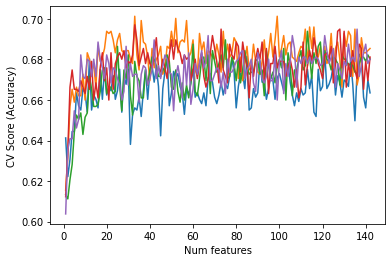

In [83]:
rf_validated = RandomForestClassifier(random_state=888)

rf_rfecv = RFECV(
    estimator=rf_validated,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)

rf_rfecv.fit(X_train, y_train)

plt.figure()
plt.xlabel("Num features")
plt.ylabel("CV Score (Accuracy)")
plt.plot(
    range(1, len(rf_rfecv.grid_scores_) + 1),
    rf_rfecv.grid_scores_,
)
plt.show()

In [84]:
rf_rfecv.n_features_

121

In [85]:
rfecv.n_features_

139

In [87]:
X_train.shape

(4721, 142)

In [90]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [92]:
grb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1)

In [93]:
grb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=1)

In [94]:
grb_clf.score(X_test, y_test)

0.676545300592718

In [24]:
from sklearn.model_selection import GridSearchCV

In [104]:
mlp_tuned = MLPClassifier(random_state=888)

mlp_param_grid = {
    'hidden_layer_sizes':[(1,),(2,),(3,)],
    'max_iter':[2000],
    'activation':['relu','tanh'],
    'solver':['sgd'],
    'alpha':[0.0001],
    'learning_rate':['constant']
}

mlp_grid = GridSearchCV(mlp_tuned, mlp_param_grid, n_jobs=-1, cv=5, verbose=5)
mlp_grid.fit(Xrecent_train, yrecent_train)
mlp_grid.score(Xrecent_test, yrecent_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


0.6666666666666666

In [105]:
mlp_grid.score(Xrecent_train,yrecent_train)

0.7000442086648984

In [106]:
mlp_grid.best_params_


{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (2,),
 'learning_rate': 'constant',
 'max_iter': 2000,
 'solver': 'sgd'}

[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(1,), learning_rate=constant, max_iter=2000, solver=sgd;, score=0.673 total time=   4.8s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2,), learning_rate=constant, max_iter=2000, solver=sgd;, score=0.685 total time=   3.8s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(2,), learning_rate=constant, max_iter=2000, solver=sgd;, score=0.669 total time=   3.8s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(3,), learning_rate=constant, max_iter=2000, solver=sgd;, score=0.686 total time=   6.4s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(1,), learning_rate=constant, max_iter=2000, solver=sgd;, score=0.662 total time=   3.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(2,), learning_rate=constant, max_iter=2000, solver=sgd;, score=0.683 total time=   3.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(3,), learning_rate=const

In [82]:
mlp_recent = MLPClassifier(random_state=888, max_iter=1000, hidden_layer_sizes=(90,))
mlp_recent.fit(Xrecent_train,yrecent_train)

MLPClassifier(hidden_layer_sizes=(90,), max_iter=1000, random_state=888)

In [90]:
mlp_recent.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (90,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 888,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [83]:
mlp_recent.score(Xrecent_test,yrecent_test)

0.6047745358090185

In [84]:
mlp_recent.score(Xrecent_train,yrecent_train)

0.9938107869142352

In [35]:
rf_clf_recent.score(Xrecent_test, yrecent_test)

0.6622458001768347

In [36]:
rf_clf_recent.score(Xrecent_train, yrecent_train)

1.0

In [86]:
Xrecent_train.shape

(4524, 141)